In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

from Gaussian import Gaussian
from LinGaussTest import LinGaussTest
from modmcmc import State, BlockMCMCSampler, LogDensityTerm, TargetDensity
from modmcmc.kernels import MarkovKernel, GaussMetropolisKernel, DiscretePCNKernel, mvn_logpdf

In [2]:
rng = np.random.default_rng(532124)
d = 3
n = 20

In [3]:
test = LinGaussTest(rng=rng, d=d, n=n)

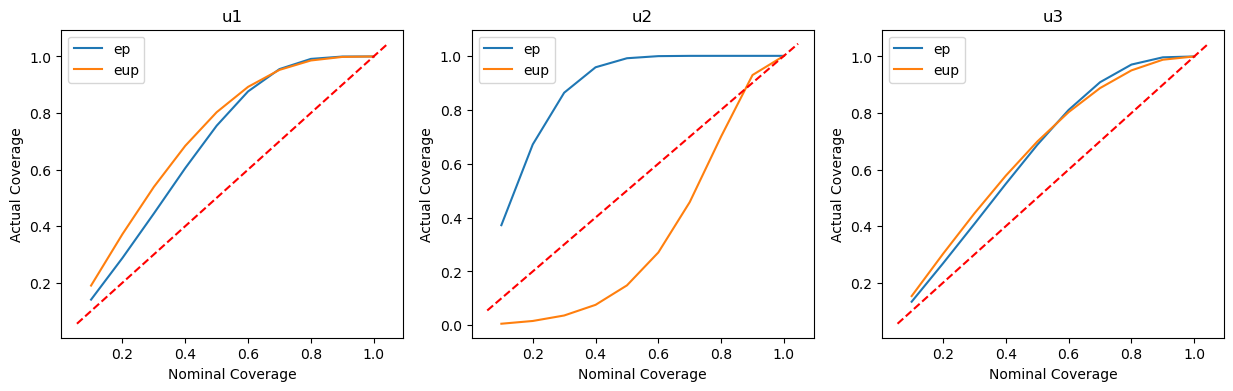

In [4]:
fig_coverage = test.plot_coverage()
display(fig_coverage)

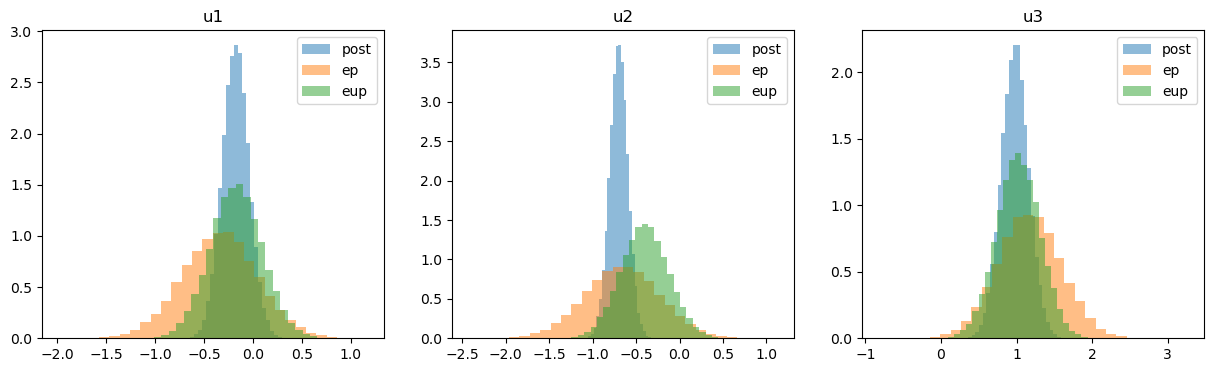

In [5]:
n_samp = 50000
fig_hist = test.get_hist_plot(n_samp)
display(fig_hist)

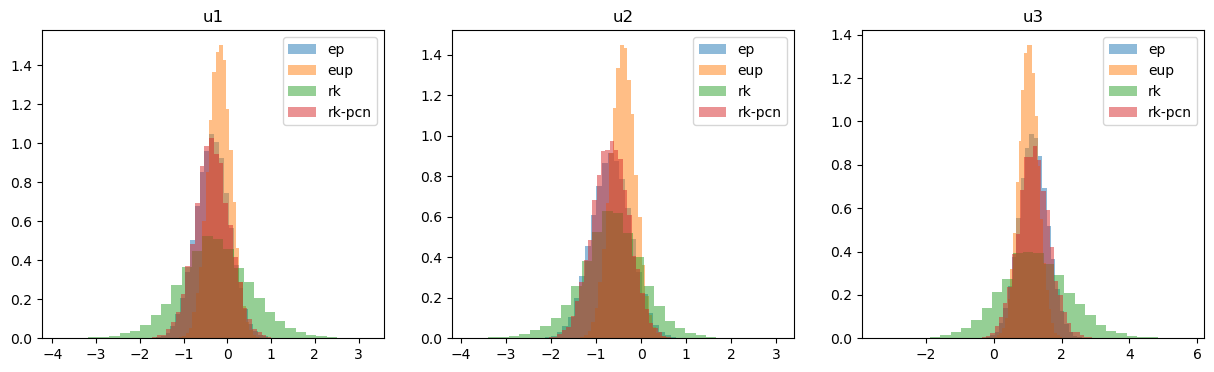

In [6]:
test.reset_samplers()
fig_rk = test.get_hist_plot(n_samp, include=["ep", "eup", "rk", "rk-pcn"])
display(fig_rk)

In [ ]:
cov_scalers = [0.1, 0.5, 0.9]
figs = []
for s in cov_scalers:
    test.reset_samplers()
    test.samplers["rk-pcn"].kernels[0].proposal.cov = s * test.prior.cov
    fig = test.get_hist_plot(n_samp, include=["ep", "rk-pcn"])
    figs.append(fig)
    display(fig)